I am using the heart disease dataset provided on canvas. The citation is below this code cell. 

In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

from google.colab import drive
drive.mount("/content/gdrive")

hf = pd.read_csv("/content/gdrive/My Drive/HeartFailure.csv", skiprows = 0)


#results = []
#with open() as csvfile:
#    reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC) # change contents to floats
 #   for row in reader: # each row is a list
 #       results.append(row)
#print(results)

raw_data = np.array(hf)  #Create a numpy array from the data

age = [] 
hbp = []
an = []    #Initialize lists for all the features being used
cp = []
db = []
ejec = []
pl = []
sc = []
ss = []
sex = []
smo = []
time = []
death = []

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020)

My thought process for this was to get every individual feature into their own list so that I can have all these different columns saved if needed. Although this may have been more code than needed, it still works properly. Visualizing this data is important because it can give us a better look at what is actually causing heart disease. I chose to use all the features because it seemed that this data isn't necessarily overfit. I believe there are many reasons for a person getting a heart disease, and hopefully the clustering proves this as well. 

In [15]:
#   Gathering columns/features into different lists #
#          in order to create easy histograms       #


for i in range(298):    
  age.append(raw_data[i,0])
  an.append(raw_data[i,1])
  cp.append(raw_data[i,2])
  db.append(raw_data[i,3])
  ejec.append(raw_data[i,4])
  hbp.append(raw_data[i,5])
  pl.append(raw_data[i,6])
  sc.append(raw_data[i,7])
  ss.append(raw_data[i,8])
  sex.append(raw_data[i,9])
  smo.append(raw_data[i,10])
  time.append(raw_data[i,11])
  death.append(raw_data[i,12])

features = ["age", "anaemia", "creatine_phosphokinase", "diabetes", 
            "ejection_fraction", "high_blood_pressure", "platelets",
            "serum_creatinine", "serum_sodium", "sex", "smoking",
            "time", "death"]

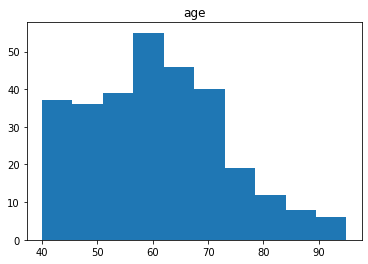

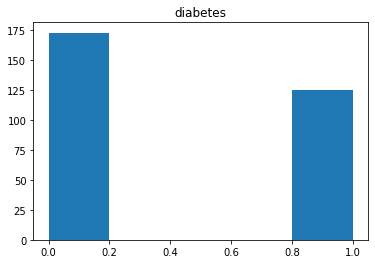

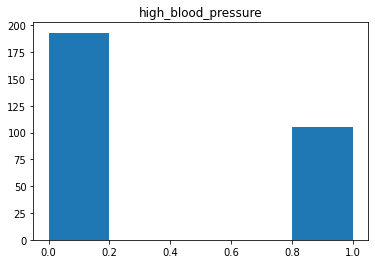

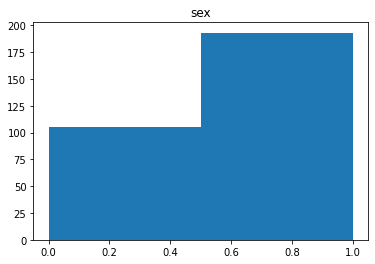

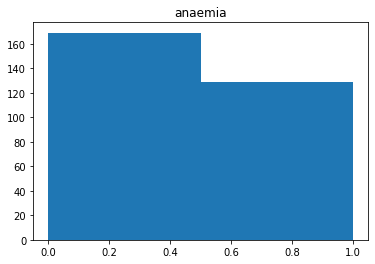

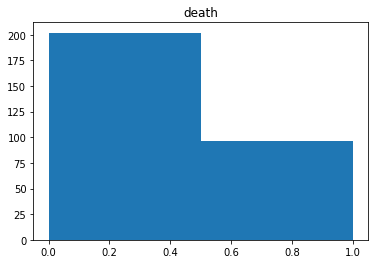

In [16]:
#  Only printing out a few of the features as I did not want too many graphs #
#                      cluttering my code.                                   #

plt.hist(age, bins = 10)
plt.title(features[0])
plt.show()

plt.hist(db, bins = 5)
plt.title(features[3])
plt.show()

plt.hist(hbp, bins = 5)
plt.title(features[5])
plt.show()

plt.hist(sex, bins = 2)
plt.title(features[9])  #Keep in mind, woman is 0 on the histogram. #
plt.show()              #              Man is 1                     #

plt.hist(an, bins = 2)
plt.title(features[1])
plt.show()

plt.hist(death, bins = 2)
plt.title(features[12])
plt.show()

0.7466666666666667


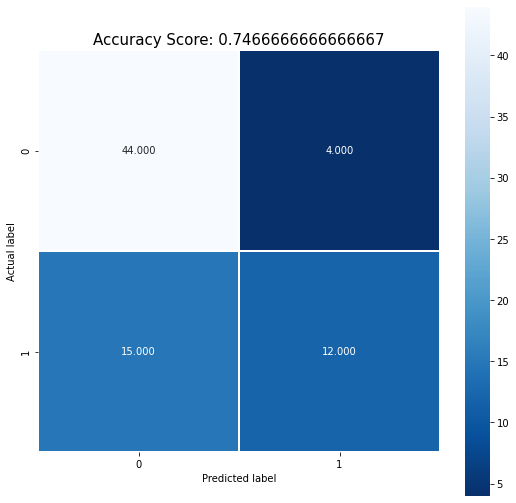

In [30]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import metrics

#Function to extract the last target column, the death prediction
def column(matrix, i): 
    return [row[i] for row in matrix]

X = raw_data[0:,:12]            #Get all the features up until the death. 
y = column(raw_data, 12)        #Calls column function made above

#Splitting data into test and train // 75% train 25% test //
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

logisticRegr = LogisticRegression()  #instantiate LR class
logisticRegr.fit(x_train, y_train)   #Fit to the train data
logisticRegr.predict(x_test[0:12])   #Predict from all the features

predictions = logisticRegr.predict(x_test) #Important to use test data for this
score = logisticRegr.score(x_test, y_test) #Computes final "accuracy score"
print(score)


#Compute Confusion Matrix
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

Shown here is the score computed for the logistic regression's accuracy. It scored a 74.6% which is lower than I was expecting. Perhaps the data may be overfitted or else it was extracted incorrectly when getting it into the test and train data. The confusion matrix is a good diagram of how the model did. It did not predict actual death's vary accurately, as you can see from the lower right hand part of the box. 